# Import des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Spécifier le chemin du fichier Excel
chemin_fichier = "ACP/CLGFRA.xlsx"

# Lire le fichier Excel en utilisant les lignes 3 à 15 comme en-têtes de colonnes
dfCLG = pd.read_excel(chemin_fichier)

In [2]:
label_ep = ['PV','PU HEP','REP','REP+']

In [3]:
dfCLG.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,GMMoy,GMHaut,EFF,IPS,EP
0,0040001E,10.3,6.9,30.2,21.6,3.4,48.2,48.3,150.1,6.9,44.8,48.2,108,99.4,1
1,0040004H,9.6,10.7,26.7,20.1,30.0,36.6,33.4,145.6,30.0,40.0,30.0,161,100.6,1
2,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,29.2,27.8,313,88.6,1
3,0040014U,10.0,5.9,28.2,22.0,11.5,38.4,50.0,124.0,33.3,51.8,14.8,110,102.5,1
4,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,40.7,34.8,292,98.3,1


### Import des IVAC

In [4]:
# Spécifier le chemin du fichier Excel
chemin_fichier_va = "ACP/CLGVA.xlsx"

# Lire le fichier Excel en utilisant les lignes 3 à 15 comme en-têtes de colonnes
dfVA = pd.read_excel(chemin_fichier_va)

In [5]:
dfVA.head()

,UAI,VA,TXDNB
0,0010002X,-14,0.77
1,0010005A,-1,0.91
2,0010008D,-5,0.86
3,0010018P,-5,0.80
4,0010022U,3,0.96


In [6]:
# À n'exécuter que si on souhaite faire l'ACP avec les IVAC
dfIVAC = pd.merge(dfCLG, dfVA[['UAI', 'VA','TXDNB']], on='UAI', how='inner')
#dfIVAC = dfessai.dropna(axis=0, how='any')
dfCLG = dfIVAC[dfIVAC.columns[:-4].tolist() + ['TXDNB','VA','IPS','EP']]
dfCLG.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,GMMoy,GMHaut,EFF,TXDNB,VA,IPS,EP
0,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,29.2,27.8,313,0.84,-2,88.6,1
1,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,40.7,34.8,292,0.89,-3,98.3,1
2,0040019Z,10.4,10.6,28.8,24.1,26.7,46.7,26.7,141.7,19.5,45.6,34.8,193,0.95,5,101.5,1
3,0040022C,10.3,8.9,32.1,24.7,34.4,38.4,27.2,100.5,33.1,31.8,35.1,653,0.92,-2,108.5,1
4,0040044B,9.3,8.4,36.1,23.7,29.3,39.1,31.8,99.7,25.6,46.4,28.0,355,0.89,0,93.7,1


In [7]:
dfCLG['VA'].describe()

count    5981.000000
mean       -1.019228
std         5.866816
min       -27.000000
25%        -4.000000
50%         0.000000
75%         3.000000
max        27.000000
Name: VA, dtype: float64

## Import des indicateurs supplémentaires

On prend en compte:
- le % de boursiers à l'échelon 3 : ECH3
- le % de boursiers: BRS
- le % d'élèves en retard à l'entrée en 6ème: RET
- les scores aux évaluations en 6ème en mathématiques et en français :SCF et SCM

In [8]:
# Spécifier le chemin du fichier Excel
chemin_fichier_indicsup = "CLGINDICSUP.xlsx"

# Lire le fichier Excel 
dfINDICSUP = pd.read_excel(chemin_fichier_indicsup)

In [9]:
dfSUP = pd.merge(dfCLG, dfINDICSUP[['UAI','ECH3','BRS','RET','SCF','SCM']], on='UAI', how='inner')
dfSUP.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,...,EFF,TXDNB,VA,IPS,EP,ECH3,BRS,RET,SCF,SCM
0,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,...,313,0.84,-2,88.6,1,13.7,43.5,11.5,253.9,242.6
1,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,...,292,0.89,-3,98.3,1,9.2,28.4,4.6,251.8,256.9
2,0040019Z,10.4,10.6,28.8,24.1,26.7,46.7,26.7,141.7,19.5,...,193,0.95,5,101.5,1,4.7,20.7,9.1,256.2,259.8
3,0040022C,10.3,8.9,32.1,24.7,34.4,38.4,27.2,100.5,33.1,...,653,0.92,-2,108.5,1,5.4,20.4,2.3,247.2,254.6
4,0040044B,9.3,8.4,36.1,23.7,29.3,39.1,31.8,99.7,25.6,...,355,0.89,0,93.7,1,18.3,41.7,9.5,255.1,254.4


In [10]:
dfCLG = dfSUP[dfSUP.columns[:-9].tolist() + ['ECH3','BRS','RET','SCF','SCM','TXDNB','IPS','VA','EP']]
dfCLG.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,...,EFF,ECH3,BRS,RET,SCF,SCM,TXDNB,IPS,VA,EP
0,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,...,313,13.7,43.5,11.5,253.9,242.6,0.84,88.6,-2,1
1,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,...,292,9.2,28.4,4.6,251.8,256.9,0.89,98.3,-3,1
2,0040019Z,10.4,10.6,28.8,24.1,26.7,46.7,26.7,141.7,19.5,...,193,4.7,20.7,9.1,256.2,259.8,0.95,101.5,5,1
3,0040022C,10.3,8.9,32.1,24.7,34.4,38.4,27.2,100.5,33.1,...,653,5.4,20.4,2.3,247.2,254.6,0.92,108.5,-2,1
4,0040044B,9.3,8.4,36.1,23.7,29.3,39.1,31.8,99.7,25.6,...,355,18.3,41.7,9.5,255.1,254.4,0.89,93.7,0,1


In [11]:
dfCLG.shape
colonnes = dfCLG.columns.to_list()
print(colonnes)

['UAI', 'DNB_F', 'DNB_M', 'D_IPS', 'EsurD', 'GFBas', 'GFMoy', 'GFHaut', 'IEL', 'GMBas', 'GMMoy', 'GMHaut', 'EFF', 'ECH3', 'BRS', 'RET', 'SCF', 'SCM', 'TXDNB', 'IPS', 'VA', 'EP']


In [12]:
dfCLG.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,...,EFF,ECH3,BRS,RET,SCF,SCM,TXDNB,IPS,VA,EP
0,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,...,313,13.7,43.5,11.5,253.9,242.6,0.84,88.6,-2,1
1,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,...,292,9.2,28.4,4.6,251.8,256.9,0.89,98.3,-3,1
2,0040019Z,10.4,10.6,28.8,24.1,26.7,46.7,26.7,141.7,19.5,...,193,4.7,20.7,9.1,256.2,259.8,0.95,101.5,5,1
3,0040022C,10.3,8.9,32.1,24.7,34.4,38.4,27.2,100.5,33.1,...,653,5.4,20.4,2.3,247.2,254.6,0.92,108.5,-2,1
4,0040044B,9.3,8.4,36.1,23.7,29.3,39.1,31.8,99.7,25.6,...,355,18.3,41.7,9.5,255.1,254.4,0.89,93.7,0,1


In [13]:
dfCLG = dfCLG.dropna()

# Analyse en composantes principales

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
palette = sns.color_palette("tab10",n_colors=5)

In [15]:
# Analyse des données manquantes dans le dataframe

In [16]:
dfCLG['EP'] = dfCLG['EP'].astype(float)
dfCLG['VA'] = dfCLG['VA'].astype(float)
dfCLG['EFF'] = dfCLG['EFF'].astype(float)
dfCLG['RET'] = dfCLG['RET'].astype(float)


In [17]:
dfCLG['SCF'] = dfCLG['SCF'].astype(float)
dfCLG['SCM'] = dfCLG['SCM'].astype(float)

In [18]:
dfCLG.isnull().sum()

UAI       0
DNB_F     0
DNB_M     0
D_IPS     0
EsurD     0
GFBas     0
GFMoy     0
GFHaut    0
IEL       0
GMBas     0
GMMoy     0
GMHaut    0
EFF       0
ECH3      0
BRS       0
RET       0
SCF       0
SCM       0
TXDNB     0
IPS       0
VA        0
EP        0
dtype: int64

In [19]:
# Analyse descriptive des variables quantitatives

In [20]:
dfCLG.dtypes

UAI        object
DNB_F     float64
DNB_M     float64
D_IPS     float64
EsurD     float64
GFBas     float64
GFMoy     float64
GFHaut    float64
IEL       float64
GMBas     float64
GMMoy     float64
GMHaut    float64
EFF       float64
ECH3      float64
BRS       float64
RET       float64
SCF       float64
SCM       float64
TXDNB     float64
IPS       float64
VA        float64
EP        float64
dtype: object

<AxesSubplot:>

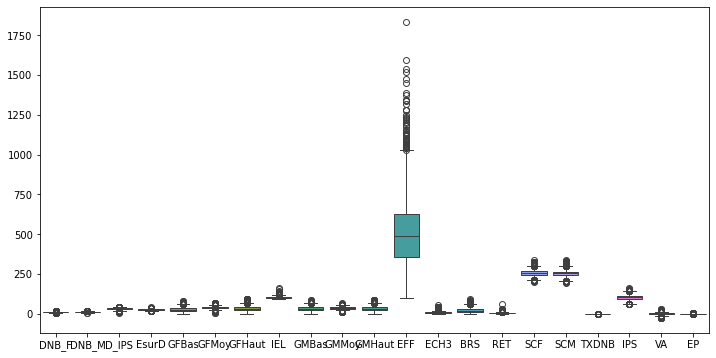

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=dfCLG,ax=ax)

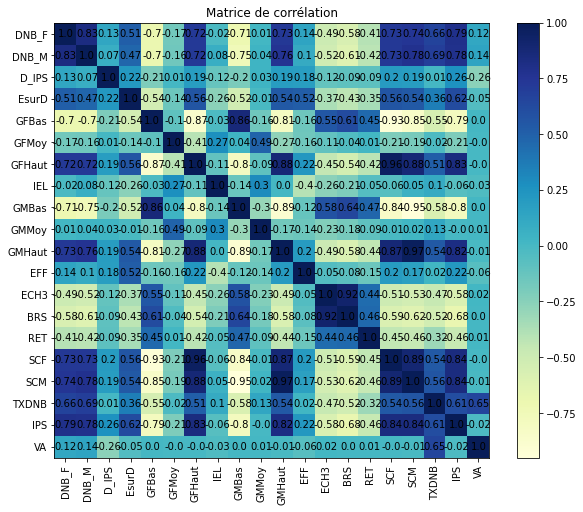

In [22]:
# Obtenir le tableau de corrélation
corr_matrix = dfCLG.iloc[:,1:-1].corr()

# Créer une carte à partir de la matrice de corrélation
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='YlGnBu')

# Ajouter les valeurs de corrélation dans chaque case
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = plt.text(j, i, round(corr_matrix.iloc[i, j], 2),
                        ha='center', va='center', color='black')
# Afficher la carte
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matrice de corrélation')
plt.show()

## Construction de l'ACP

In [25]:
# Rejet de certaines variables

dfACP =  dfCLG.drop(columns=['GFBas','GFHaut','GMBas','GMHaut','VA','EP'])

In [26]:
dfACP.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFMoy,IEL,GMMoy,EFF,ECH3,BRS,RET,SCF,SCM,TXDNB,IPS
0,0040013T,9.2,6.7,31.3,22.4,45.7,96.6,29.2,313.0,13.7,43.5,11.5,253.9,242.6,0.84,88.6
1,0040017X,8.4,8.4,30.6,24.3,37.2,129.4,40.7,292.0,9.2,28.4,4.6,251.8,256.9,0.89,98.3
2,0040019Z,10.4,10.6,28.8,24.1,46.7,141.7,45.6,193.0,4.7,20.7,9.1,256.2,259.8,0.95,101.5
3,0040022C,10.3,8.9,32.1,24.7,38.4,100.5,31.8,653.0,5.4,20.4,2.3,247.2,254.6,0.92,108.5
4,0040044B,9.3,8.4,36.1,23.7,39.1,99.7,46.4,355.0,18.3,41.7,9.5,255.1,254.4,0.89,93.7


In [27]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = dfACP.iloc[:, 1:].values

In [28]:
X.shape
D = X.shape[1]

In [29]:
# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X_scaled)

## Aide à l'interprétation

### Choix du nombre d'axes

In [31]:
# Analyse des valeurs propres et de la variance expliquée
pca.explained_variance_,pca.explained_variance_ratio_

(array([6.46923964, 2.22446599, 1.32419921, 0.89719791, 0.82499923,
        0.66140552, 0.54521602, 0.49571633, 0.45699719, 0.34726468,
        0.28207113, 0.16683413, 0.13914129, 0.09548871, 0.07227599]),
 array([0.4312104 , 0.14827289, 0.08826516, 0.05980318, 0.05499074,
        0.04408632, 0.03634165, 0.03304222, 0.03046138, 0.0231471 ,
        0.01880159, 0.01112041, 0.00927453, 0.00636485, 0.00481759]))

In [32]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(D)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,6.469240,43.0,43.0
1,Dim2,2.224466,15.0,58.0
2,Dim3,1.324199,9.0,67.0
3,Dim4,0.897198,6.0,73.0
4,Dim5,0.824999,5.0,78.0
5,Dim6,0.661406,4.0,83.0
6,Dim7,0.545216,4.0,86.0
7,Dim8,0.495716,3.0,90.0
8,Dim9,0.456997,3.0,93.0
9,Dim10,0.347265,2.0,95.0


### Critère de Kayser
On ne retient que les dimensions principales associées à un valeur propre supérieure à l'unité puisque les variables descriptives primaires sont préalablement centrées réduites, et donc que leur variance respective est égale à 1. Par conséquent, une composante ayant une valeur propre inférieure à 1 a un pouvoir explicatif inférieur à celui d’une variable descriptive primaire.

On ne considère ici que les 3 premières dimensions.

In [33]:
seuil = 100./D

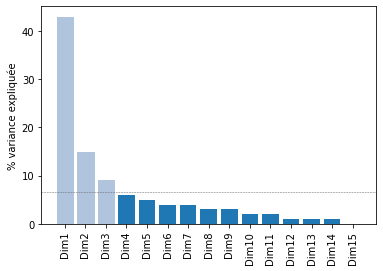

In [34]:
fig, ax = plt.subplots()
barres = ax.bar(eig["Dimension"], eig["% variance expliquée"], color='tab:blue')
# Modifier la couleur des barres dont la valeur propre est supérieure à 1 en rouge
for i, dimension in enumerate(eig["Dimension"]):
    valeur_propre = eig.loc[i, "Variance expliquée"]
    if valeur_propre > 1:
        barres[i].set_color('lightsteelblue')
#plt.text(5, 18, "%2.1f"%seuil) # ajout de texte
plt.axhline(y = seuil, linewidth = .5, color = "dimgray", linestyle = "--") # ligne seuil
plt.xticks(rotation=90)
plt.ylabel("% variance expliquée")
plt.show()

In [35]:
# Les trois premiers axes permettent d'expliquer 65% de la variance.

In [36]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

Dplus = D+1
feature_names=dfACP.columns[1:Dplus]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'Dim{i+1}_contrib' for i in range(D)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

       Dim1_contrib  Dim2_contrib  Dim3_contrib  Dim4_contrib  Dim5_contrib  \
DNB_F      0.737880      0.002057      0.029322      0.002832      0.048057   
DNB_M      0.750499      0.001363      0.052652      0.000631      0.037062   
D_IPS      0.044400      0.034524      0.271074      0.594580      0.015790   
EsurD      0.441882      0.125556      0.125610      0.038575      0.005386   
GFMoy      0.023855      0.400559      0.244894      0.005550      0.065692   
IEL        0.000506      0.567279      0.043967      0.014583      0.049446   
GMMoy      0.005775      0.420377      0.196113      0.000745      0.127175   
EFF        0.058410      0.342256      0.257723      0.113829      0.000252   
ECH3       0.517717      0.157506      0.020697      0.012972      0.141474   
BRS        0.632432      0.103805      0.005850      0.014625      0.103305   
RET        0.332144      0.007278      0.020938      0.050968      0.101482   
SCF        0.768986      0.016388      0.005347     

In [37]:
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'Dim{i+1}_contrib' for i in range(D)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

       Dim1_contrib  Dim2_contrib  Dim3_contrib  Dim4_contrib  Dim5_contrib  \
DNB_F     11.405973      0.092488      2.214322      0.315646      5.825061   
DNB_M     11.601040      0.061251      3.976115      0.070370      4.492321   
D_IPS      0.686319      1.552026     20.470783     66.270766      1.913979   
EsurD      6.830513      5.644318      9.485755      4.299500      0.652838   
GFMoy      0.368741     18.006981     18.493721      0.618567      7.962617   
IEL        0.007814     25.501827      3.320250      1.625387      5.993463   
GMMoy      0.089269     18.897885     14.809930      0.083079     15.415214   
EFF        0.902888     15.385984     19.462568     12.687142      0.030567   
ECH3       8.002748      7.080602      1.563008      1.445851     17.148362   
BRS        9.775992      4.666492      0.441749      1.630069     12.521849   
RET        5.134204      0.327170      1.581177      5.680850     12.300916   
SCF       11.886811      0.736720      0.403797     

In [38]:
X_proj = pca.transform(X_scaled)

In [39]:
# Transformation en DataFrame pandas
X_proj_df = pd.DataFrame({
    "Dim1" : X_proj[:,0], 
    "Dim2" : X_proj[:,1],
    "Dim3" : X_proj[:,2],
    "Dim4" : X_proj[:,3],
    "Dim5" : X_proj[:,4],
})

# Résultat (premières lignes)
X_proj_df.head()

,Dim1,Dim2,Dim3,Dim4,Dim5
0,3.187726,-0.572719,0.525227,-1.104672,0.558734
1,1.256611,2.532354,0.985763,-0.979028,-1.166191
2,0.027945,4.864174,1.468432,-1.230665,-0.001223
3,-0.138774,-0.623381,-0.197420,0.143285,-0.796507
4,2.029270,-0.016255,-0.379261,-1.900355,1.646714


### Représentations graphiques

In [40]:
# Créer le cercle de corrélation
def cercle(Dim1,Dim2):
    eigval = (D-1)/D*pca.explained_variance_
    sqrt_eigval = np.sqrt(eigval)
    
    corvar = np.zeros((D,D))
    for k in range(D):
        corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
    
    # Créer la figure
    plt.figure(figsize=(10, 10))

    # Placer les vecteurs des variables
    for i in range(D):
        plt.arrow(0, 0, corvar[i, Dim1], corvar[i, Dim2], color='k', alpha=0.9, head_width=0.02)
        plt.text(corvar[i, Dim1] * 1.15, corvar[i, Dim2] * 1.15, feature_names[i], color='k', ha='center', va='center')

    # Placer le cercle unitaire
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

    # Ajuster les limites et les axes
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color='gray', linewidth=1)
    plt.axvline(0, color='gray', linewidth=1)
    labelx = "Dimension "+str(Dim1+1)
    labely = "Dimension "+str(Dim2+1)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title('Cercle de corrélation')

    # Afficher la figure
    plt.show()
    

In [41]:
def coordvar(Dim1,Dim2,Dim3):
        eigval = (D-1)/D*pca.explained_variance_
        sqrt_eigval = np.sqrt(eigval)
    
        corvar = np.zeros((D,D))
        for k in range(D):
            corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
        
        # on crée un dataframe
        coordvar = pd.DataFrame({'id': feature_names, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1], 'COR_3': corvar[:,2]})
        return coordvar

In [42]:
dfcorr = coordvar(0,1,2)
dfcorr

,id,COR_1,COR_2,COR_3
0,DNB_F,-0.829872,-0.043820,0.165430
1,DNB_M,-0.836938,0.035661,0.221679
2,D_IPS,-0.203567,-0.179507,-0.502993
3,EsurD,-0.642202,-0.342324,-0.342398
4,GFMoy,0.149213,0.611437,-0.478087
5,IEL,-0.021721,0.727641,0.202572
6,GMMoy,-0.073417,0.626380,-0.427830
7,EFF,-0.233487,-0.565189,-0.490450
8,ECH3,0.695128,-0.383413,0.138987
9,BRS,0.768290,-0.311262,0.073890


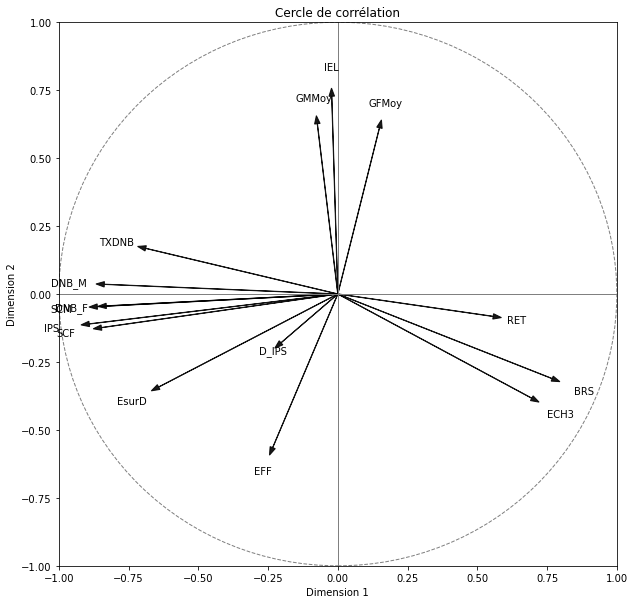

In [43]:
cercle(0,1)

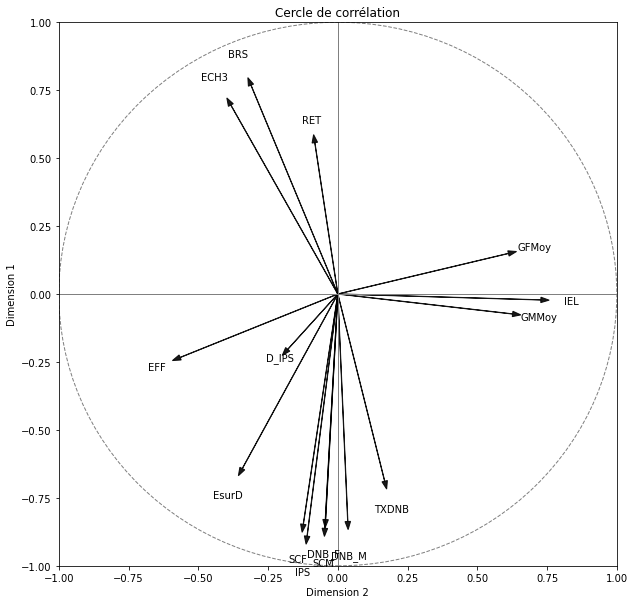

In [44]:
cercle(1,0)

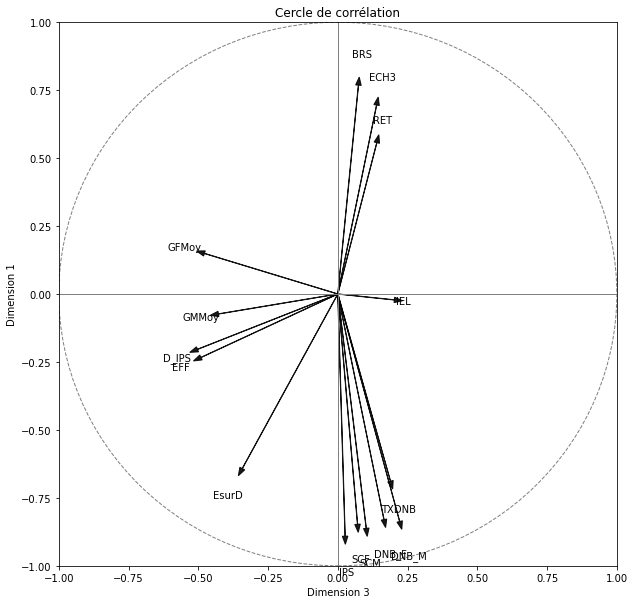

In [45]:
cercle(2,0)

- **Dimension 1:** dimension positivement corrélée à tous les indicateurs liés au positionnement social (IPS, résultats au DNB) et négativement au taux de boursiers ou à l'indicateur de retard scolaire : il s'agit d'un **indicateur social**.
- **Dimensions 2 et 3:** elles décrivent le collège selon d'autres dimensions. La dimension 2 oppose les collèges à l'**indice d'éloignement du collège** élevé à ceux qui ont un effectif important, les dimensions 2 et 3 sont également corrélées au pourcentage d'élèves accueillis en sixième avec un niveau moyen en français et en mathématiques;la dimension 3 est corrélée à l'**hétérogénéité sociale** de la population scolaire. Ces deux dimensions sont des **indicateurs de population scolaire**. 

In [49]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c,palette=palette)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'Dim{x+1} {v1}')
    ax.set_ylabel(f'Dim{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur Dim{x+1} et Dim{y+1})")
    plt.show()

/var/folders/jq/yf48rmms58zcxrhd5_x4rjm80000gn/T/ipykernel_42914/1906782123.py:58: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c,palette=palette)


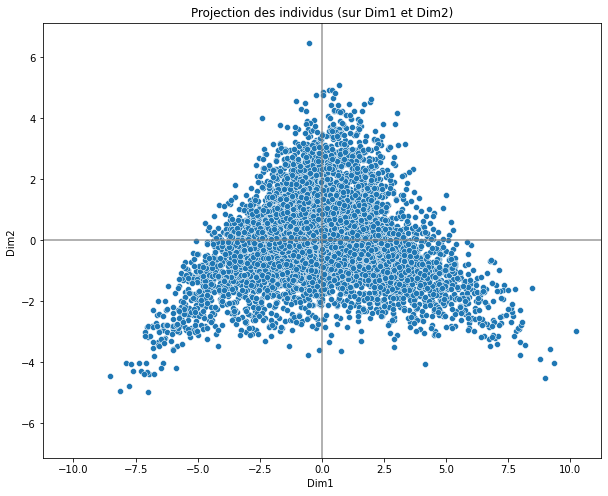

In [50]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y)

/var/folders/jq/yf48rmms58zcxrhd5_x4rjm80000gn/T/ipykernel_42914/1906782123.py:58: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c,palette=palette)


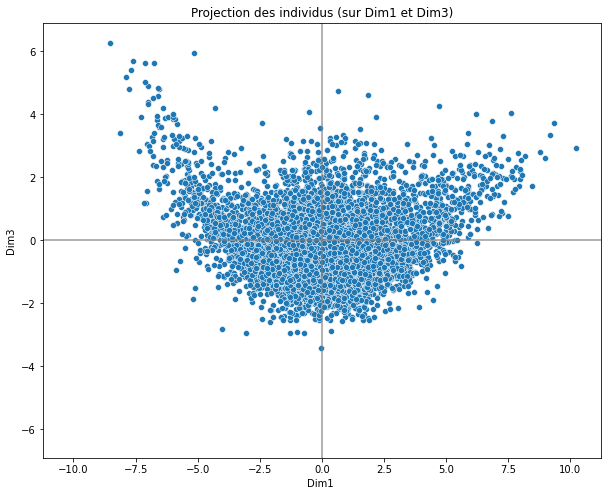

In [51]:
x_y = [0,2]
display_factorial_planes(X_proj, x_y)

/var/folders/jq/yf48rmms58zcxrhd5_x4rjm80000gn/T/ipykernel_42914/1906782123.py:58: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c,palette=palette)


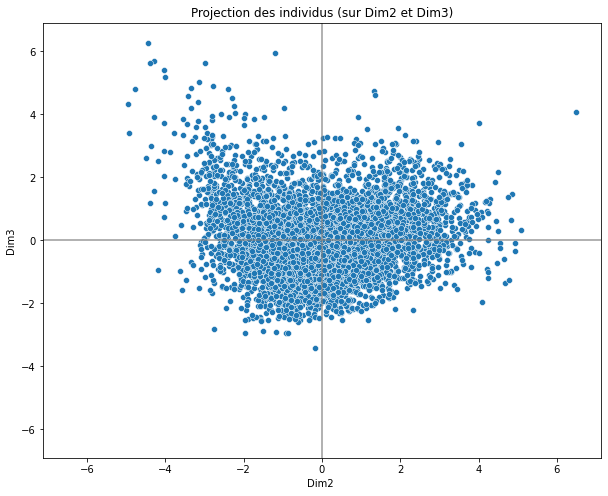

In [52]:
x_y = [1,2]
display_factorial_planes(X_proj, x_y)

## Clustering avec KMeans

In [53]:
from sklearn.cluster import KMeans

In [54]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

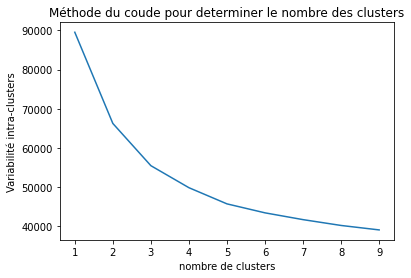

In [55]:
plt.plot(range(1, 10), wcss)
plt.title('Méthode du coude pour determiner le nombre des clusters')
plt.xlabel('nombre de clusters')
plt.ylabel('Variabilité intra-clusters')
plt.show()

In [56]:
nbre_clusters = 5

In [57]:
kmeans = KMeans(n_clusters=nbre_clusters, init = 'k-means++')
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

In [58]:
dfACP['cluster']=clusters

In [59]:
df_clusters = dfACP.select_dtypes(include=[np.number]).groupby(['cluster']).median().round(0)
    
df_clusters

,DNB_F,DNB_M,D_IPS,EsurD,GFMoy,IEL,GMMoy,EFF,ECH3,BRS,RET,SCF,SCM,TXDNB,IPS
cluster,,,,,,,,,,,,,,,
0,12.0,14.0,28.0,29.0,32.0,97.0,33.0,603.0,1.0,6.0,1.0,286.0,284.0,1.0,133.0
1,10.0,10.0,29.0,24.0,44.0,111.0,41.0,287.0,4.0,18.0,5.0,253.0,252.0,1.0,101.0
2,8.0,7.0,25.0,23.0,37.0,96.0,31.0,479.0,18.0,54.0,9.0,234.0,226.0,1.0,79.0
3,9.0,8.0,31.0,26.0,40.0,98.0,36.0,526.0,8.0,30.0,6.0,248.0,243.0,1.0,95.0
4,11.0,11.0,33.0,27.0,41.0,100.0,38.0,562.0,3.0,14.0,3.0,264.0,262.0,1.0,113.0


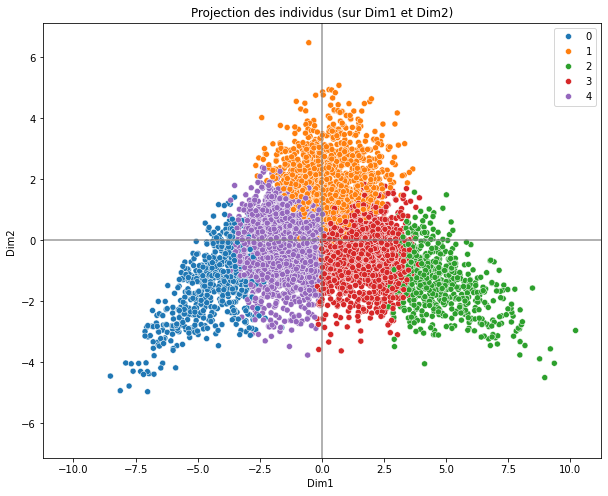

In [60]:
display_factorial_planes(X_proj, [0,1],clusters=clusters)

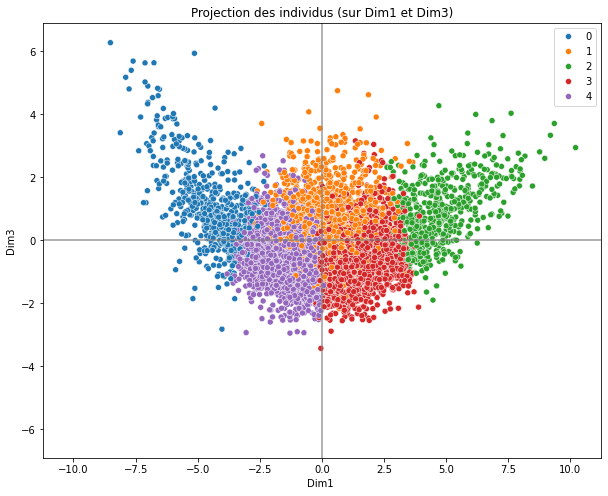

In [61]:
display_factorial_planes(X_proj, [0,2],clusters=clusters)

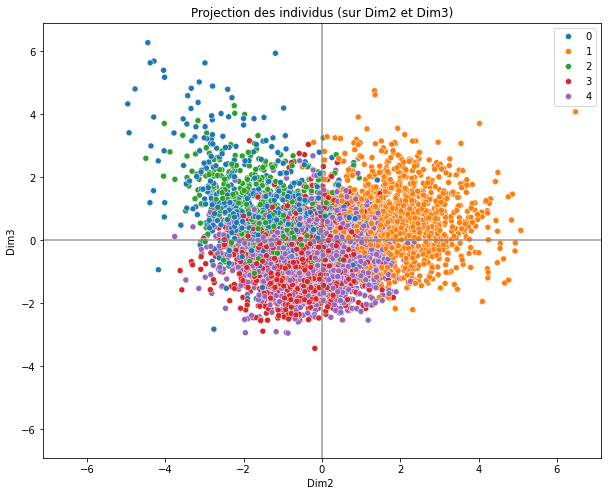

In [62]:
display_factorial_planes(X_proj, [1,2],clusters=clusters)

In [63]:
df_clusters.head()

,DNB_F,DNB_M,D_IPS,EsurD,GFMoy,IEL,GMMoy,EFF,ECH3,BRS,RET,SCF,SCM,TXDNB,IPS
cluster,,,,,,,,,,,,,,,
0,12.0,14.0,28.0,29.0,32.0,97.0,33.0,603.0,1.0,6.0,1.0,286.0,284.0,1.0,133.0
1,10.0,10.0,29.0,24.0,44.0,111.0,41.0,287.0,4.0,18.0,5.0,253.0,252.0,1.0,101.0
2,8.0,7.0,25.0,23.0,37.0,96.0,31.0,479.0,18.0,54.0,9.0,234.0,226.0,1.0,79.0
3,9.0,8.0,31.0,26.0,40.0,98.0,36.0,526.0,8.0,30.0,6.0,248.0,243.0,1.0,95.0
4,11.0,11.0,33.0,27.0,41.0,100.0,38.0,562.0,3.0,14.0,3.0,264.0,262.0,1.0,113.0


In [64]:
dfACP.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFMoy,IEL,GMMoy,EFF,ECH3,BRS,RET,SCF,SCM,TXDNB,IPS,cluster
0,0040013T,9.2,6.7,31.3,22.4,45.7,96.6,29.2,313.0,13.7,43.5,11.5,253.9,242.6,0.84,88.6,3
1,0040017X,8.4,8.4,30.6,24.3,37.2,129.4,40.7,292.0,9.2,28.4,4.6,251.8,256.9,0.89,98.3,1
2,0040019Z,10.4,10.6,28.8,24.1,46.7,141.7,45.6,193.0,4.7,20.7,9.1,256.2,259.8,0.95,101.5,1
3,0040022C,10.3,8.9,32.1,24.7,38.4,100.5,31.8,653.0,5.4,20.4,2.3,247.2,254.6,0.92,108.5,4
4,0040044B,9.3,8.4,36.1,23.7,39.1,99.7,46.4,355.0,18.3,41.7,9.5,255.1,254.4,0.89,93.7,3


In [65]:
df_fin = pd.merge(dfCLG, dfACP[['UAI', 'cluster']], on='UAI', how='left')
df_fin.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,...,ECH3,BRS,RET,SCF,SCM,TXDNB,IPS,VA,EP,cluster
0,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,...,13.7,43.5,11.5,253.9,242.6,0.84,88.6,-2.0,1.0,3
1,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,...,9.2,28.4,4.6,251.8,256.9,0.89,98.3,-3.0,1.0,1
2,0040019Z,10.4,10.6,28.8,24.1,26.7,46.7,26.7,141.7,19.5,...,4.7,20.7,9.1,256.2,259.8,0.95,101.5,5.0,1.0,1
3,0040022C,10.3,8.9,32.1,24.7,34.4,38.4,27.2,100.5,33.1,...,5.4,20.4,2.3,247.2,254.6,0.92,108.5,-2.0,1.0,4
4,0040044B,9.3,8.4,36.1,23.7,29.3,39.1,31.8,99.7,25.6,...,18.3,41.7,9.5,255.1,254.4,0.89,93.7,0.0,1.0,3


In [66]:
moyennes = df_fin.iloc[:,1:-1].mean()

In [67]:
liste_moyennes = [moyennes]
for i in range(nbre_clusters):
    df_filtre = df_fin[df_fin.iloc[:, -1] == i]
    liste_moyennes.append(df_filtre.iloc[:,1:-1].mean())

In [68]:
df_moyennes = pd.DataFrame(liste_moyennes)
df_moyennes = df_moyennes.drop(columns=['EP'],axis=1)
noms_lignes = ['national', 'cluster0', 'cluster1', 'cluster2', 'cluster3','cluster4']
df_moyennes.index = noms_lignes

In [69]:
# Compter le nombre de lignes pour chaque combinaison EP et cluster
count_df = df_fin.groupby(['EP', 'cluster']).size().unstack().fillna(0)
count_df

cluster,0,1,2,3,4
EP,,,,,
0.0,422.0,306.0,14.0,44.0,517.0
1.0,141.0,979.0,68.0,1153.0,1438.0
2.0,0.0,42.0,255.0,312.0,6.0
3.0,0.0,1.0,243.0,29.0,0.0


In [70]:
# Ajouter les colonnes EP0, EP1, EP2 et EP3 dans df_moyennes 
df_moyennes['Privé sous contrat'] = [count_df.loc[0,:].sum(), count_df.loc[0, 0]/count_df.loc[0,:].sum(), count_df.loc[0, 1]/count_df.loc[0,:].sum(), count_df.loc[0, 2]/count_df.loc[0,:].sum(), count_df.loc[0, 3]/count_df.loc[0,:].sum(),count_df.loc[0, 4]/count_df.loc[0,:].sum()]
df_moyennes['Public HEP'] = [count_df.loc[1,:].sum(), count_df.loc[1, 0]/count_df.loc[1,:].sum(), count_df.loc[1, 1]/count_df.loc[1,:].sum(), count_df.loc[1, 2]/count_df.loc[1,:].sum(), count_df.loc[1, 3]/count_df.loc[1,:].sum(),count_df.loc[1, 4]/count_df.loc[1,:].sum()]
df_moyennes['REP'] = [count_df.loc[2,:].sum(), count_df.loc[2, 0]/count_df.loc[2,:].sum(), count_df.loc[2, 1]/count_df.loc[2,:].sum(), count_df.loc[2, 2]/count_df.loc[2,:].sum(), count_df.loc[2, 3]/count_df.loc[2,:].sum(),count_df.loc[2, 4]/count_df.loc[2,:].sum()]
df_moyennes['REP+'] = [count_df.loc[3,:].sum(), count_df.loc[3, 0]/count_df.loc[3,:].sum(), count_df.loc[3, 1]/count_df.loc[3,:].sum(), count_df.loc[3, 2]/count_df.loc[3,:].sum(), count_df.loc[3, 3]/count_df.loc[3,:].sum(),count_df.loc[3, 4]/count_df.loc[3,:].sum()]

In [71]:
df_moyennes.iloc[:,:11]

,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,GMMoy,GMHaut
national,10.214456,9.888794,30.292663,25.764556,26.578409,39.936281,33.486851,101.893166,31.698811,37.024355,31.274690
cluster0,12.393783,13.624689,27.867673,29.215275,8.372824,31.173890,60.454707,97.344760,11.831261,32.173179,55.995027
cluster1,10.114759,10.000452,28.503389,23.926280,27.166943,43.563931,29.269277,110.950301,30.366792,40.817093,28.813253
cluster2,8.438448,6.735862,25.127069,22.709310,46.796207,36.832241,16.371034,96.739138,55.329655,31.341897,13.333103
cluster3,9.435696,8.346099,31.610468,25.487646,33.548244,40.146034,26.305592,99.140117,40.271977,36.256567,23.469181
cluster4,10.792351,10.883070,32.694850,27.139572,19.960479,40.748853,39.295105,100.749057,24.591688,38.131515,37.272769


In [72]:
df_moyennes.iloc[:,11:-4]

,EFF,ECH3,BRS,RET,SCF,SCM,TXDNB,IPS,VA
national,500.559296,6.458023,23.315461,5.092513,256.715812,253.789497,0.891878,104.621055,-1.021441
cluster0,637.229130,2.050977,8.332327,1.796803,287.252398,286.099822,0.981528,133.528064,0.817052
cluster1,303.541416,4.147440,19.218675,5.286145,253.343373,252.489759,0.907801,101.042319,-0.215361
cluster2,481.693103,19.488793,53.210862,9.202931,233.013621,226.114828,0.787276,78.993621,0.446552
cluster3,535.943433,8.589662,30.125813,6.369441,247.718075,242.543238,0.842243,95.234395,-2.855007
cluster4,572.571647,3.762111,16.208057,3.690362,264.299847,262.399082,0.925222,113.687098,-1.091280


In [73]:
df_moyennes.iloc[:,-4:]

,Privé sous contrat,Public HEP,REP,REP+
national,1303.000000,3779.000000,615.000000,273.000000
cluster0,0.323868,0.037311,0.000000,0.000000
cluster1,0.234843,0.259063,0.068293,0.003663
cluster2,0.010744,0.017994,0.414634,0.890110
cluster3,0.033768,0.305107,0.507317,0.106227
cluster4,0.396777,0.380524,0.009756,0.000000


In [74]:
# Correspondances des valeurs de "cluster" aux valeurs de "groupe"
correspondances = {0: 5, 1: 3, 2: 1,3: 2,4: 4}

# Créer la nouvelle colonne "groupe" en utilisant les correspondances
df_fin['groupe'] = df_fin['cluster'].map(correspondances)


**groupe 1:** (cluster 2) ensemble des collèges, plutôt en mileu urbain, qui relèvent de l'éducation prioritaire ou dont le profil s'en rapproche: IPS nettement plus faible que la moyenne nationale, taux de boursier et d'élèves en retard à l'entrée en sixième significativement plus élevés qu'en moyenne nationale, population scolaire d'élèves qui obtiennent des résultats nettement inférieurs à la moyenne nationale. Ces collèges sont caractérisés par une hétérogénéité sociale réduite et une hétérogénéité de niveaux scolaires plus élevée que la moyenne nationale (avec une proportion plus grande d'élèves en difficulté qu'en moyenne nationale). La quasi-totalité des collèges REP+ figurent dans ce groupe.

**groupe 2:** (cluster 3) ensemble des collèges dont le profil est celui des secteurs publics HEP et REP, caractérisés par un effectif plus important qu'en moyenne nationale, des résultats au DNB inférieurs à la moyenne nationale, une hétérogénéité de performance scolaire modérée en classe de sixième. Le taux de boursiers est plus élevé qu'en moyenne nationale. Ces collèges affichent en moyenne un indice IVAC nettement négatif (moins-value).

**groupe 3:** (cluster 1) ensemble des collèges dont le profil est plutôt celui des secteur privé sous contrat et public (plutôt HEP) dont la population scolaire n'est pas particulièrement favorisée du point de vue social, avec une hétérogénéité sociale limitée. Les élèves obtiennent des résultats au DNB conformes à la moyenne nationale. Il s'agit de collèges dont l'effectif est plus réduit en milieu plutôt rural.

**groupe 4:** (cluster 4) ensemble des collèges dont le profil est plutôt celui du secteur privé sous contrat et public HEP, d'effectif important, avec une population scolaire plus favorisée socialement qu'au plan national, d'hétérogénité sociale moyenne, un taux de boursiers inférieur à la moyenne nationale. Le niveau de performance scolaire des élèves de ces collèges est supérieur à la moyenne nationale.

**groupe 5:** (cluster 0) ensemble des collèges du secteur privé sous contrat, plutôt en milieu urbain, dont la population scolaire est socialement très favorisée, de faible hétérogénéité sociale, dont les élèves obtiennent des résultats scolaires très nettement supérieurs aux moyennes nationales. Il s'agit de collèges aux effectifs très importants.

In [75]:
denominations = {'cluster0':'groupe5', 'cluster1':'groupe3','cluster2':'groupe1','cluster3':'groupe2','cluster4':'groupe4'}
df_moyennes.rename(index=denominations, inplace=True)
# Réindexer le DataFrame selon l'ordre personnalisé de l'index
nouvel_ordre = ['national','groupe1','groupe2','groupe3','groupe4','groupe5']
df_moyennes = df_moyennes.reindex(nouvel_ordre)

In [76]:
df_moyennes.iloc[:,:11]

,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,GMMoy,GMHaut
national,10.214456,9.888794,30.292663,25.764556,26.578409,39.936281,33.486851,101.893166,31.698811,37.024355,31.274690
groupe1,8.438448,6.735862,25.127069,22.709310,46.796207,36.832241,16.371034,96.739138,55.329655,31.341897,13.333103
groupe2,9.435696,8.346099,31.610468,25.487646,33.548244,40.146034,26.305592,99.140117,40.271977,36.256567,23.469181
groupe3,10.114759,10.000452,28.503389,23.926280,27.166943,43.563931,29.269277,110.950301,30.366792,40.817093,28.813253
groupe4,10.792351,10.883070,32.694850,27.139572,19.960479,40.748853,39.295105,100.749057,24.591688,38.131515,37.272769
groupe5,12.393783,13.624689,27.867673,29.215275,8.372824,31.173890,60.454707,97.344760,11.831261,32.173179,55.995027


In [77]:
df_moyennes.iloc[:,11:-4]

,EFF,ECH3,BRS,RET,SCF,SCM,TXDNB,IPS,VA
national,500.559296,6.458023,23.315461,5.092513,256.715812,253.789497,0.891878,104.621055,-1.021441
groupe1,481.693103,19.488793,53.210862,9.202931,233.013621,226.114828,0.787276,78.993621,0.446552
groupe2,535.943433,8.589662,30.125813,6.369441,247.718075,242.543238,0.842243,95.234395,-2.855007
groupe3,303.541416,4.147440,19.218675,5.286145,253.343373,252.489759,0.907801,101.042319,-0.215361
groupe4,572.571647,3.762111,16.208057,3.690362,264.299847,262.399082,0.925222,113.687098,-1.091280
groupe5,637.229130,2.050977,8.332327,1.796803,287.252398,286.099822,0.981528,133.528064,0.817052


In [78]:
df_moyennes.iloc[:,-4:]

,Privé sous contrat,Public HEP,REP,REP+
national,1303.000000,3779.000000,615.000000,273.000000
groupe1,0.010744,0.017994,0.414634,0.890110
groupe2,0.033768,0.305107,0.507317,0.106227
groupe3,0.234843,0.259063,0.068293,0.003663
groupe4,0.396777,0.380524,0.009756,0.000000
groupe5,0.323868,0.037311,0.000000,0.000000


In [79]:
df_fin.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,...,BRS,RET,SCF,SCM,TXDNB,IPS,VA,EP,cluster,groupe
0,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,...,43.5,11.5,253.9,242.6,0.84,88.6,-2.0,1.0,3,2
1,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,...,28.4,4.6,251.8,256.9,0.89,98.3,-3.0,1.0,1,3
2,0040019Z,10.4,10.6,28.8,24.1,26.7,46.7,26.7,141.7,19.5,...,20.7,9.1,256.2,259.8,0.95,101.5,5.0,1.0,1,3
3,0040022C,10.3,8.9,32.1,24.7,34.4,38.4,27.2,100.5,33.1,...,20.4,2.3,247.2,254.6,0.92,108.5,-2.0,1.0,4,4
4,0040044B,9.3,8.4,36.1,23.7,29.3,39.1,31.8,99.7,25.6,...,41.7,9.5,255.1,254.4,0.89,93.7,0.0,1.0,3,2


In [80]:
df_fin.drop('cluster', axis=1, inplace=True)

In [81]:
gpe = ["groupe 1","groupe 2","groupe 3","groupe 4","groupe 5"]

In [82]:
couleur_groupe = ['blue','gray','green','orange','purple']

### Répartition des collèges par groupes dans chaque département

In [83]:
valeur_groupe = 4
df_filtre = df_fin[df_fin.iloc[:, -1] == valeur_groupe]

In [84]:
M = len(gpe)+1

In [85]:
def repartition(dpt):
    df_dpt = df_fin[df_fin.iloc[:, 0].str.startswith(dpt)]
    # Compter le nombre de collèges du département dpt pris en compte dans l'analyse
    nombre_CLG = len(df_dpt)

    repartition_groupe = []
    for i in range(1,nbre_clusters+1):
        # Compter le nombre de lignes où la dernière colonne "groupe" prend la valeur i
        repartition_groupe.append((df_dpt["groupe"] == i).sum())
    # on convertit la liste en tableau numpy
    repartition_groupe = np.array(repartition_groupe)
    # on calcule les % de collèges dans chaque cluster
    repartition_groupe = repartition_groupe / nombre_CLG
    print ("Département " + dpt + " :")
    for i in range(nbre_clusters):
        print("\033[1;34m%2.1f %%\033[0m des collèges dans"%(repartition_groupe[i]*100)+" le "+gpe[i])

In [86]:
repartition("068")

Département 068 :
12.3 % des collèges dans le groupe 1
30.8 % des collèges dans le groupe 2
10.8 % des collèges dans le groupe 3
38.5 % des collèges dans le groupe 4
7.7 % des collèges dans le groupe 5


In [87]:
repartition("093")

Département 093 :
49.3 % des collèges dans le groupe 1
33.8 % des collèges dans le groupe 2
1.4 % des collèges dans le groupe 3
10.6 % des collèges dans le groupe 4
4.9 % des collèges dans le groupe 5


## Caractérisation des groupes

### Représentation des barycentres des groupes dans le plan factoriel

In [88]:
# Transformation en DataFrame pandas
XX_proj_df = pd.DataFrame({
    "Dim1" : X_proj[:,0], 
    "Dim2" : X_proj[:,1],
    "Dim3" : X_proj[:,2],
})
df_fin_proj = pd.concat([df_fin.iloc[:, :-1], XX_proj_df, df_fin.iloc[:, -1:]], axis=1)
df_fin_proj.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,...,SCF,SCM,TXDNB,IPS,VA,EP,Dim1,Dim2,Dim3,groupe
0,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,...,253.9,242.6,0.84,88.6,-2.0,1.0,3.187726,-0.572719,0.525227,2
1,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,...,251.8,256.9,0.89,98.3,-3.0,1.0,1.256611,2.532354,0.985763,3
2,0040019Z,10.4,10.6,28.8,24.1,26.7,46.7,26.7,141.7,19.5,...,256.2,259.8,0.95,101.5,5.0,1.0,0.027945,4.864174,1.468432,3
3,0040022C,10.3,8.9,32.1,24.7,34.4,38.4,27.2,100.5,33.1,...,247.2,254.6,0.92,108.5,-2.0,1.0,-0.138774,-0.623381,-0.197420,4
4,0040044B,9.3,8.4,36.1,23.7,29.3,39.1,31.8,99.7,25.6,...,255.1,254.4,0.89,93.7,0.0,1.0,2.029270,-0.016255,-0.379261,2


In [89]:
def display_factorial_planes_gpe(x_y,
                                 alpha=0.9,
                                 figsize=[10,8],
                                 marker="." ):
    """
    Affiche la projection de chaque groupe dans un plan factoriel

    Positional arguments :
    -------------------------------------
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """
    # Les abscisses des points sont contenues dans un tableau numpy construit à partir de la liste Points
    Points = []
    Size = []
    
    # Calcul des positions des points pour chaque groupe
    for i in range(1,nbre_clusters+1):
        masque = df_fin_proj['groupe'] == i
        df_gpe = df_fin_proj[masque]
        Size.append(df_gpe.shape[0])
        X = df_gpe['Dim1'].mean()
        Y = df_gpe['Dim2'].mean()
        Z = df_gpe['Dim3'].mean()
        Points.append([X,Y,Z]) 
    
    Points= np.array(Points)

    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (10,8)

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)


    # Les points
    groupes_int = [1,2,3,4,5]
    sns.scatterplot(data=None, x=Points[:, x], y=Points[:, y], hue = groupes_int, palette=couleur_groupe, size = Size, sizes=(20,200), legend="full")

    
    # Nom des axes
    ax.set_xlabel(f'Dim{x+1}')
    ax.set_ylabel(f'Dim{y+1}')
    

    # Valeur x max et y max
    x_max = np.abs(Points[:, x]).max() *1.1
    y_max = np.abs(Points[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=alpha)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=alpha)


    # Display
    handles, labels = ax.get_legend_handles_labels()
    handles = handles[:len(couleur_groupe)]  # Limiter les poignées aux points de couleur
    plt.legend(handles=handles, labels=groupes_int, title="Groupes")
    
    plt.show()

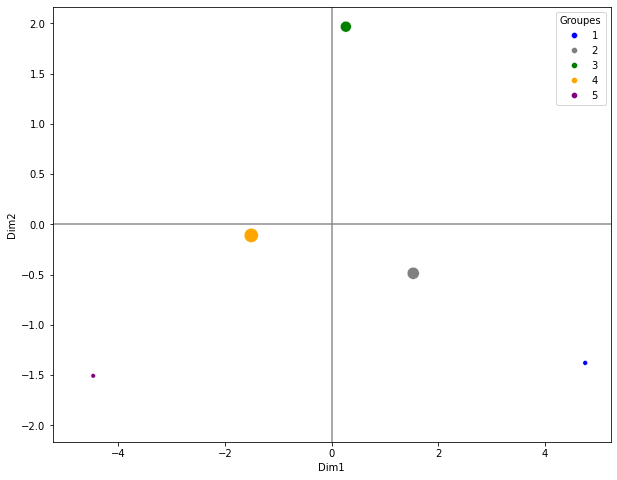

In [90]:
display_factorial_planes_gpe([0,1])

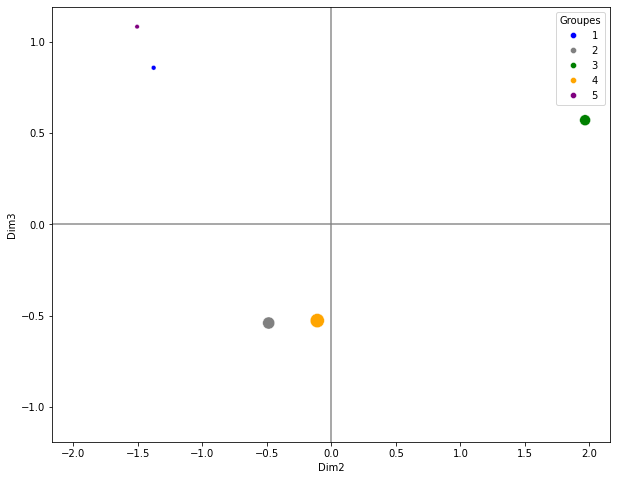

In [91]:
display_factorial_planes_gpe([1,2])

### Représentation des collèges en projection dans un plan de deux variables primitives

In [92]:
groupes = [1,4]
palette = [couleur_groupe[i-1] for i in groupes]
palette

['blue', 'orange']

In [93]:
df_t = df_fin_proj.iloc[:,1:]
df_t.head()

,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,GMMoy,...,SCF,SCM,TXDNB,IPS,VA,EP,Dim1,Dim2,Dim3,groupe
0,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,29.2,...,253.9,242.6,0.84,88.6,-2.0,1.0,3.187726,-0.572719,0.525227,2
1,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,40.7,...,251.8,256.9,0.89,98.3,-3.0,1.0,1.256611,2.532354,0.985763,3
2,10.4,10.6,28.8,24.1,26.7,46.7,26.7,141.7,19.5,45.6,...,256.2,259.8,0.95,101.5,5.0,1.0,0.027945,4.864174,1.468432,3
3,10.3,8.9,32.1,24.7,34.4,38.4,27.2,100.5,33.1,31.8,...,247.2,254.6,0.92,108.5,-2.0,1.0,-0.138774,-0.623381,-0.197420,4
4,9.3,8.4,36.1,23.7,29.3,39.1,31.8,99.7,25.6,46.4,...,255.1,254.4,0.89,93.7,0.0,1.0,2.029270,-0.016255,-0.379261,2


In [94]:
def display_primitive_planes(x_y,
                             dpt=None,
                             alpha=1,
                             figsize=[10,8],
                             groupes=None,
                             marker="." ):
    """
    Affiche la projection de chaque groupe dans un plan de variables primitives
    0: 'DNB_F', 1: 'DNB_M', 2: 'D_IPS', 3: 'EsurD', 4: 'GFBas', 5: 'GFMoy', 6: 'GFHaut',
    7: 'IEL', 8: 'GMBas', 9: 'GMMoy', 10: 'GMHaut', 11: 'EFF', 12: 'ECH3', 13: 'BRS', 14: 'RET', 15: 'SCF',
    16: 'SCM', 17: 'TXDNB', 18: 'IPS', 19: 'VA', 'EP', 'Dim1', 'Dim2',
    'Dim3', 'groupe'

    Arguments :
    -------------------------------------
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [7,11] 
    pour IEL en abscisse et EFF en ordonnée 

    Arguments optionnels:
    -------------------------------------
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """
    if groupes is None:
        groupes = [1,2,3,4,5]
    
    masque = df_fin_proj['groupe'].isin(groupes)
    df_utile = df_fin_proj[masque]
    
    palette = [couleur_groupe[i-1] for i in groupes]
    
    if dpt is None :
        X_ = np.array(df_utile.iloc[:,1:].values)
    else :
        df_t = df_fin_proj[df_utile.iloc[:, 0].str.startswith(dpt)]
        X_ = np.array(df_t.iloc[:,1:].values)

    
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (10,8)

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)


    # Les points
    groupes_int = X_[:, -1].astype(int)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue = groupes_int, palette=palette,legend="full")

    
    # Nom des axes
    ax.set_xlabel(f'{df_fin_proj.columns[x+1]}')
    ax.set_ylabel(f'{df_fin_proj.columns[y+1]}')
    

    # Valeur x max et y max
    x_min = np.abs(X_[:, x]).min() *0.9
    x_max = np.abs(X_[:, x]).max() *1.1
    y_min = np.abs(X_[:, y]).min() *0.9
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=x_min, right=x_max)
    ax.set_ylim(bottom=y_min, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([x_min, x_max], [0, 0], color='grey', alpha=alpha)
    plt.plot([0,0], [y_min, y_max], color='grey', alpha=alpha)


    # Display
    plt.legend(title="Groupes")
    
    plt.show()

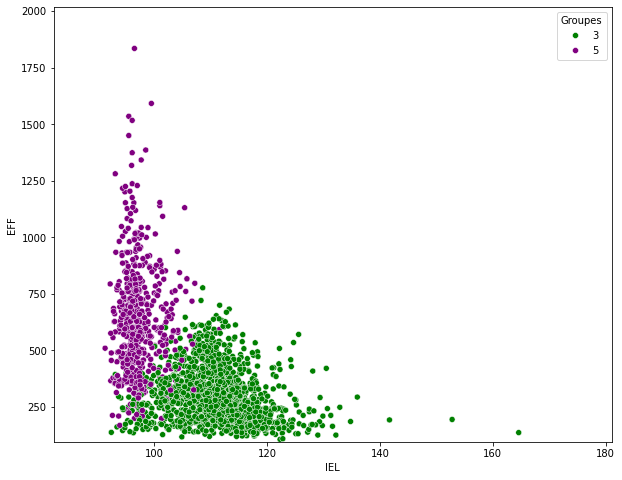

In [95]:
display_primitive_planes([7,11],figsize=(10,8),groupes=[3,5])

Les collèges du groupe 3 se distinguent par des effectifs parmi les plus faibles et un indice d'éloignement important, alors que ceux des groupes 1 et 5 sont caractérisés par un indice d'éloignement plus faible et des effectifs élevés.

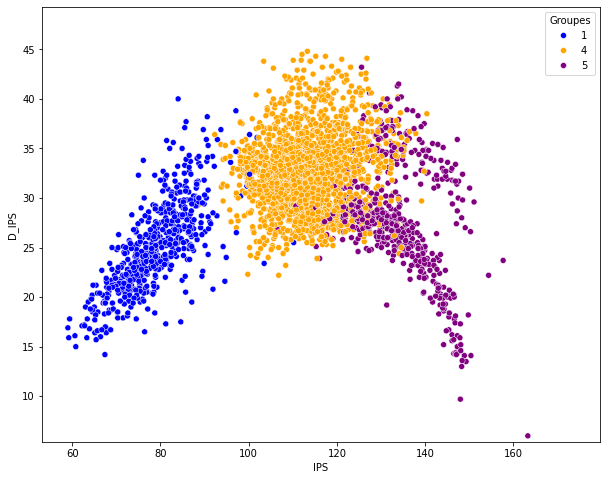

In [97]:
display_primitive_planes([18,2],figsize=(10,8),groupes=[1,4,5])

Les collèges du groupe 1 figurent parmi les plus défavorisés socialement et sont caractérisés par une faible hétérogénéité sociale. Les collèges du groupe 4, socialement favorisés, sont caractérisés par une mixité sociale réduite.
Pour les collèges les plus favorisés socialement (groupe 5), on retrouve une faible mixité sociale.

L'"entre-soi" joue donc des deux côtés de l'échelle sociale.

### Projection des variables non prises en compte sur les dimensions principales

In [98]:
colonnes_a_traiter = [5,7,9,11]
L = len(colonnes_a_traiter)
# Définir les colonnes et les index du dataframe
vecteur_index = [df_fin_proj.columns[i] for i in colonnes_a_traiter]
vecteur_col = ['Dim1', 'Dim2','Dim3']

# Créer un dataframe vide avec les colonnes et les index spécifiés
df_proj_autres = pd.DataFrame(index=vecteur_index, columns=vecteur_col)
idx = 0
for i in colonnes_a_traiter:
    corr1 = df_fin_proj.iloc[:,i].corr(df_fin_proj['Dim1'])
    corr2 = df_fin_proj.iloc[:,i].corr(df_fin_proj['Dim2'])
    corr3 = df_fin_proj.iloc[:,i].corr(df_fin_proj['Dim3'])
    #corr4 = df_fin_proj.iloc[:,i].corr(df_fin_proj['Dim4'])
    df_proj_autres.iloc[idx] = [corr1,corr2,corr3]#,corr4**2]
    idx +=1

In [99]:
df_va_proj = pd.merge(dfVA,df_fin_proj[['UAI', 'Dim1', 'Dim2', 'Dim3']], on='UAI', how='inner')
df_va_proj.head()
df_va_proj.shape

(5970, 6)

In [100]:
lst_proj_va = pd.DataFrame(index=vecteur_index, columns=vecteur_col)

corr1 = df_va_proj['VA'].corr(df_va_proj['Dim1'])
corr2 = df_va_proj['VA'].corr(df_va_proj['Dim2'])
corr3 = df_va_proj['VA'].corr(df_va_proj['Dim3'])
#corr4 = df_va_proj['VA'].corr(df_va_proj['Dim4'])
lst_proj_va = [corr1,corr2,corr3]

In [1014]:
# Créer le cercle de corrélation avec toutes les variables
def cerclecomplet(Dim1,Dim2):
    eigval = (D-1)/D*pca.explained_variance_
    sqrt_eigval = np.sqrt(eigval)
    
    corvar = np.zeros((D,D))
    for k in range(D):
        corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

    # Créer la figure
    plt.figure(figsize=(10, 10))

    # Placer les vecteurs des variables
    for i in range(D):
        plt.arrow(0, 0, corvar[i, Dim1], corvar[i, Dim2], color='k', alpha=0.9, head_width=0.02)
        plt.text(corvar[i, Dim1] * 1.15, corvar[i, Dim2] * 1.15, feature_names[i], color='k', ha='center', va='center')
        
    # Placer les vecteurs des variables supplémentaires
    for i in range(L):
        plt.arrow(0, 0, df_proj_autres.iloc[i,Dim1], df_proj_autres.iloc[i,Dim2], color='b', ls='--', alpha=0.9, head_width=0.02)
        plt.text(df_proj_autres.iloc[i,Dim1] * 1.15, df_proj_autres.iloc[i,Dim2] * 1.15, df_proj_autres.index[i], color='b', ha='center', va='center')
    # Placer le cercle unitaire
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

    # Ajuster les limites et les axes
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color='gray', linewidth=1)
    plt.axvline(0, color='gray', linewidth=1)
    labelx = "Dimension "+str(Dim1+1)
    labely = "Dimension "+str(Dim2+1)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title('Cercle de corrélation')

    # Afficher la figure
    plt.show()

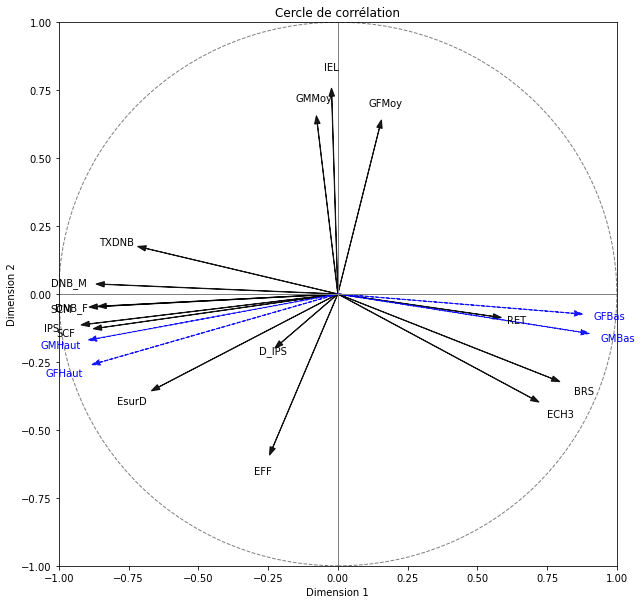

In [1015]:
cerclecomplet(0,1)

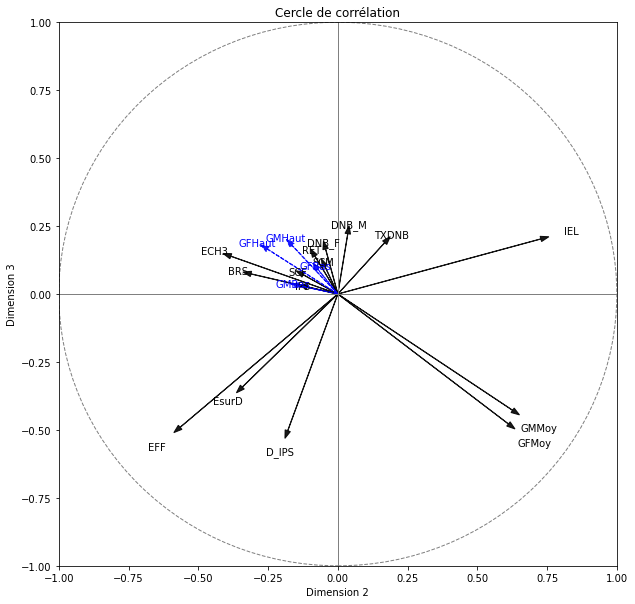

In [1016]:
cerclecomplet(1,2)

In [104]:
def display_factorial_planes_dpt(dpt,
                                 x_y,
                                 pca=None,
                                 labels = None,
                                 groupes=None,
                                 alpha=0.9,
                                 figsize=[10,8],
                                 marker="." ):
    """
    Affiche la projection des individus

    Arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Arguments optionnels:
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fait, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    groupes : list ou tuple : la liste des groupes auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """
    df_dpt = df_fin_proj[df_fin_proj.iloc[:, 0].str.startswith(dpt)]
    
    # Transforme X_projected en np.array
    X_ = np.array(df_dpt.iloc[:,-4:].values)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (10,8)

    # On gère les labels
    if  labels is None :
        labels = df_dpt['UAI'].values
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)


    # Les points
    groupes_int = X_[:, -1].astype(int)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue = groupes_int, palette=couleur_groupe, legend="full")

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''
    Lab = ['Dimension principale 1',
           "Dimension principale 2",
           "Dimension principale 3"
          ]
    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(Lab[x])
    ax.set_ylabel(Lab[y])

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=alpha)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=alpha)

    # Affichage des labels des points
    if len(labels) :
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.07, labels[i], fontsize='8', ha='center',va='center')

    # Titre et display
    plt.legend(title="Groupes")  # Définir un titre pour la légende
    titre = "Département: "+dpt
    plt.title(titre)
    plt.show()

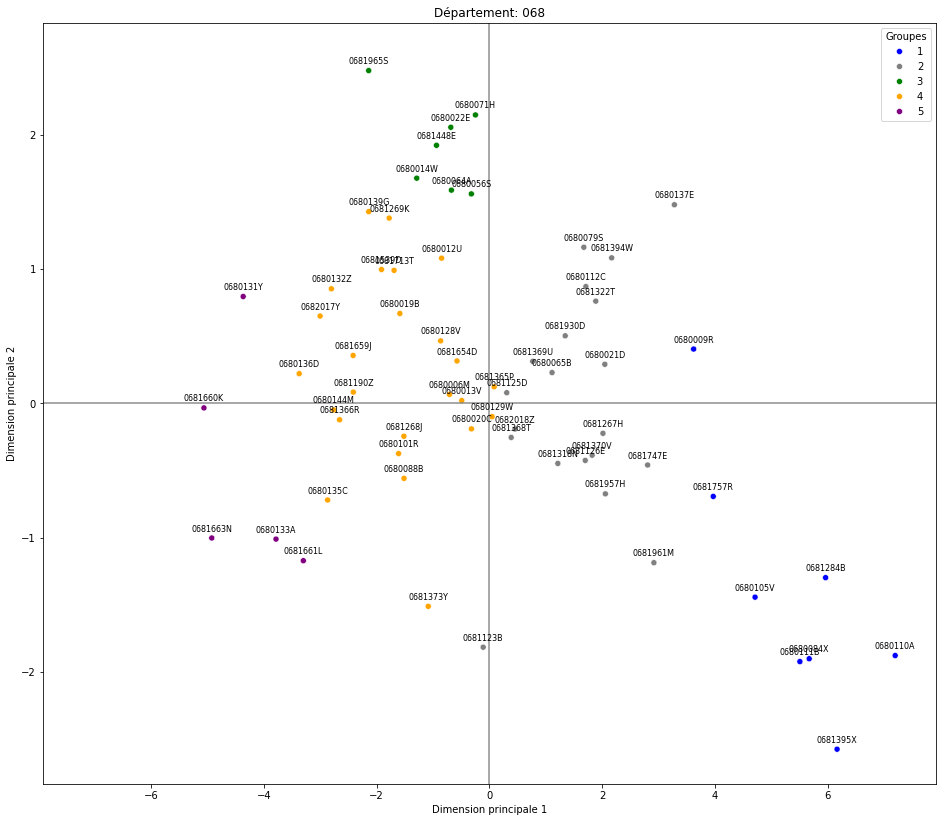

In [105]:
display_factorial_planes_dpt("068",[0,1],figsize=[16,14],groupes=[1,2,3,4,5])

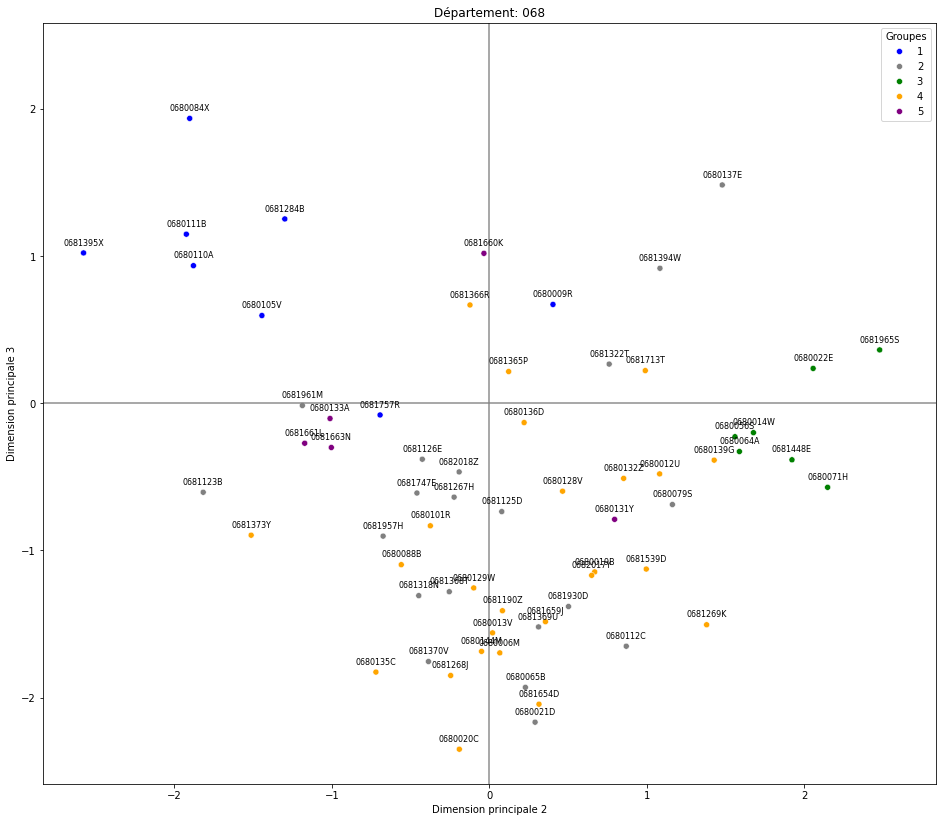

In [106]:
display_factorial_planes_dpt("068",[1,2],figsize=[16,14],groupes=[1,2,3,4,5])

# Cartographie

In [1030]:
import folium

In [1040]:
# import du fichier Excel avec les références géographiques des collèges
df_coor = pd.read_excel("ACP/GEOCLG2.xlsx")
df_coor["CP"]=df_coor["CP"].astype(str)
# fusion avec le dataframe qui contient les indicateurs et le numéro de cluster
df_geo = pd.merge(df_fin_proj, df_coor, on='UAI', how='left')

In [1042]:
df_complet = df_geo
df_complet.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,...,Dim1,Dim2,Dim3,groupe,NOM,CP,COMM,LAT,LONG,DPT
0,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,...,3.187726,-0.572719,0.525227,2,Collège Le Mont d'Or,4100,Manosque,43.835289,5.787123,4
1,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,...,1.256611,2.532354,0.985763,3,Collège Maxime Javelly,4500,Riez,43.815911,6.092711,4
2,0040019Z,10.4,10.6,28.8,24.1,26.7,46.7,26.7,141.7,19.5,...,0.027945,4.864174,1.468432,3,Collège René Cassin,4170,Saint-André-les-Alpes,43.969668,6.511860,4
3,0040022C,10.3,8.9,32.1,24.7,34.4,38.4,27.2,100.5,33.1,...,-0.138774,-0.623381,-0.197420,4,Collège Gassendi,4004,Digne-les-Bains,44.089144,6.231150,4
4,0040044B,9.3,8.4,36.1,23.7,29.3,39.1,31.8,99.7,25.6,...,2.029270,-0.016255,-0.379261,2,Collège Maria Borrély,4004,Digne-les-Bains,44.094669,6.237061,4


In [1043]:
# Ajouter le caractère '0' devant les chaînes de 4 caractères dans la colonne 'CP'
df_complet.loc[df_complet['CP'].str.len() == 4, 'CP'] = df_complet.loc[df_complet['CP'].str.len() == 4, 'CP'].str.zfill(5)

In [1044]:
df_complet.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,...,Dim1,Dim2,Dim3,groupe,NOM,CP,COMM,LAT,LONG,DPT
0,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,...,3.187726,-0.572719,0.525227,2,Collège Le Mont d'Or,04100,Manosque,43.835289,5.787123,4
1,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,...,1.256611,2.532354,0.985763,3,Collège Maxime Javelly,04500,Riez,43.815911,6.092711,4
2,0040019Z,10.4,10.6,28.8,24.1,26.7,46.7,26.7,141.7,19.5,...,0.027945,4.864174,1.468432,3,Collège René Cassin,04170,Saint-André-les-Alpes,43.969668,6.511860,4
3,0040022C,10.3,8.9,32.1,24.7,34.4,38.4,27.2,100.5,33.1,...,-0.138774,-0.623381,-0.197420,4,Collège Gassendi,04004,Digne-les-Bains,44.089144,6.231150,4
4,0040044B,9.3,8.4,36.1,23.7,29.3,39.1,31.8,99.7,25.6,...,2.029270,-0.016255,-0.379261,2,Collège Maria Borrély,04004,Digne-les-Bains,44.094669,6.237061,4


In [1045]:
nom_fichier = 'ACP/CLGFRA-clusterized4.xlsx'
df_complet.to_excel(nom_fichier, index=False)

In [1047]:
# Suppression des lignes avec des latitudes et longitudes erronées ou inconnues
df_complet = df_complet.dropna()
df_complet.isnull().sum()

UAI        0
DNB_F      0
DNB_M      0
D_IPS      0
EsurD      0
GFBas      0
GFMoy      0
GFHaut     0
IEL        0
GMBas      0
GMMoy      0
GMHaut     0
EFF        0
ECH3       0
BRS        0
RET        0
SCF        0
SCM        0
DELTA_F    0
DELTA_M    0
TXDNB      0
IPS        0
VA         0
EP         0
Dim1       0
Dim2       0
Dim3       0
groupe     0
NOM        0
CP         0
COMM       0
LAT        0
LONG       0
DPT        0
dtype: int64

In [1049]:
df_complet.dtypes

UAI         object
DNB_F      float64
DNB_M      float64
D_IPS      float64
EsurD      float64
GFBas      float64
GFMoy      float64
GFHaut     float64
IEL        float64
GMBas      float64
GMMoy      float64
GMHaut     float64
EFF        float64
ECH3       float64
BRS        float64
RET        float64
SCF        float64
SCM        float64
DELTA_F    float64
DELTA_M    float64
TXDNB      float64
IPS        float64
VA         float64
EP         float64
Dim1       float64
Dim2       float64
Dim3       float64
groupe       int64
NOM         object
CP          object
COMM        object
LAT        float64
LONG       float64
DPT        float64
dtype: object

In [1054]:
def cartedpt(dpt_value,titre):
    '''
    dpt_value est une liste qui contient les numéros des départements à cartographier
    titre est une chaîne de caractères qui vient compléter le nom de la carte
    '''
    

    ## Créer une carte centrée sur la France
    map_fr = folium.Map(location=[46.603354, 1.888334], zoom_start=6)
    for elt in dpt_value:
        # Filtrer les établissements en fonction de la valeur de 'DPT'
        df_dpt = df_complet[df_complet['DPT'] == elt]
        ## On charge les données sur les communes du département
        #df_commdpt = df_comm[df_comm['DPT'] == elt]

        # Parcourir chaque ligne du dataframe
        for index, row in df_dpt.iterrows():
            lat = row['LAT']
            long = row['LONG']
            groupe = row['groupe']
            uai = row['UAI']
            nom = row['NOM']
            ep = int(row['EP'])
            cp = row['CP']
            commune = row['COMM']
            label = gpe[groupe-1]
            lab_EP = label_ep[ep]
    
            # Déterminer la couleur en fonction de la valeur de 'cluster'
            color = couleur_groupe[groupe-1]
            
            # Déterminer le nom de la commune
            nomcom = cp +' '+ commune
    
            # Ajouter un marqueur à la carte avec l'étiquette contenant 'UAI' et 'NOM'
            tooltip_content = f"{uai} - {nom} <br> {nomcom} <br> {label} <br> secteur: {lab_EP} "
            folium.Marker(location=[lat, long], icon=folium.Icon(color=color), tooltip=tooltip_content).add_to(map_fr)
    # Légende
    
    # Enregistrer la carte
    nom_fichier = "ACP/cartes/carteCLG4"+titre+".html"
    map_fr.save(nom_fichier)

In [1055]:
cartedpt([80],"SOMME")

In [1056]:
cartedpt([68],"HautRhin")

In [1057]:
cartedpt([59,62],"LILLE")

In [1058]:
cartedpt([78,91,92,93,94,95,75],"IDF")

In [1059]:
cartedpt([93,94,77],"CRETEIL")

In [1060]:
cartedpt([78,91,92,95],"VERSAILLES")

In [1061]:
cartedpt([29,22,35,56],"RENNES")

In [1062]:
cartedpt([8,51,10,52],"REIMS")

In [1063]:
cartedpt([3,15,43,63],"CLERMONTFD")

In [1064]:
cartedpt([11,30,34,48,66],"MONTPELIER")

In [1065]:
cartedpt([2,60,80],"AMIENS")

In [1066]:
cartedpt([67,68],"STRASBOURG")

In [1067]:
cartedpt([54,55,57,88],"NANCYMETZ")

In [1068]:
cartedpt([21,58,71,89],"DIJON")

In [1069]:
cartedpt([1,42,69],"LYON")

In [1070]:
cartedpt([7,26,38,73,74],"GRENOBLE")

In [1071]:
cartedpt([22,29,35,56],"RENNES")

In [1072]:
cartedpt([2],"AISNE")

In [1073]:
cartedpt([60],"OISE")

In [1074]:
cartedpt([80],"SOMME")

In [1075]:
cartedpt([9,12,31,32,81,82,65,46],"TOULOUSE")

In [1076]:
cartedpt([24,33,40,47,64],"BORDEAUX")

In [1077]:
cartedpt([4,5,13,84],"AIXMARSEILLE")

In [1078]:
cartedpt([16,17,79,86],"POITIERS")

In [1079]:
cartedpt([19,23,87],"LIMOGES")

In [1080]:
cartedpt([25,39,70,90],"BESANCON")

In [1081]:
cartedpt([76],"SEINEMARITIME")

In [1082]:
cartedpt([44,49,53,72,85],"NANTES")

In [1083]:
cartedpt([20],"CORSE")

In [1084]:
cartedpt([6,83],"NICE")

In [1085]:
cartedpt([18,28,36,41,45],"ORLEANSTOURS")

In [1086]:
cartedpt([51],"MARNE")

## Autre type de carte

Représentation du pourcentage des collèges d'un département dans un cluster donné

In [1210]:
# Chargement du fichier GeoJSON des départements
GEOJSON = "ACP/departements.geojson.txt"

### constitution du dataframe avec les données départementales

In [1211]:
liste_num_dpt = np.arange(1,96)

In [1212]:
liste_nom_dpt = [
    'Ain',
    'Aisne',
    'Allier',
    'Alpes-de-Haute-Provence',
    'Hautes-Alpes',
    'Alpes-Maritimes',
    'Ardèche',
    'Ardennes',
    'Ariège',
    'Aube',
    'Aude',
    'Aveyron',
    'Bouches-du-Rhône',
    'Calvados',
    'Cantal',
    'Charente',
    'Charente-Maritime',
    'Cher',
    'Corrèze',
    'Côte-d\'Or',
    'Côtes-d\'Armor',
    'Creuse',
    'Dordogne',
    'Doubs',
    'Drôme',
    'Eure',
    'Eure-et-Loir',
    'Finistère',
    'Gard',
    'Haute-Garonne',
    'Gers',
    'Gironde',
    'Hérault',
    'Ille-et-Vilaine',
    'Indre',
    'Indre-et-Loire',
    'Isère',
    'Jura',
    'Landes',
    'Loir-et-Cher',
    'Loire',
    'Haute-Loire',
    'Loire-Atlantique',
    'Loiret',
    'Lot',
    'Lot-et-Garonne',
    'Lozère',
    'Maine-et-Loire',
    'Manche',
    'Marne',
    'Haute-Marne',
    'Mayenne',
    'Meurthe-et-Moselle',
    'Meuse',
    'Morbihan',
    'Moselle',
    'Nièvre',
    'Nord',
    'Oise',
    'Orne',
    'Pas-de-Calais',
    'Puy-de-Dôme',
    'Pyrénées-Atlantiques',
    'Hautes-Pyrénées',
    'Pyrénées-Orientales',
    'Bas-Rhin',
    'Haut-Rhin',
    'Rhône',
    'Haute-Saône',
    'Saône-et-Loire',
    'Sarthe',
    'Savoie',
    'Haute-Savoie',
    'Paris',
    'Seine Maritime',
    'Seine-et-Marne',
    'Yvelines',
    'Deux-Sèvres',
    'Somme',
    'Tarn',
    'Tarn-et-Garonne',
    'Var',
    'Vaucluse',
    'Vendée',
    'Vienne',
    'Haute-Vienne',
    'Vosges',
    'Yonne',
    'Territoire de Belfort',
    'Essonne',
    'Hauts-de-Seine',
    'Seine-Saint-Denis',
    'Val-de-Marne',
    'Val-d\'Oise'
]

In [1213]:
df_data_dpt = pd.DataFrame(columns=["code","nom","groupe1","groupe2","groupe3","groupe4","groupe5"])

In [1214]:
listeDPT = np.arange(1,96)
listeDPT = np.delete(listeDPT, np.where(listeDPT == 20))

for elt in listeDPT:
    df_travail = df_complet[df_complet['DPT'] == elt]
    nombre_CLG = len(df_travail)
    rg = np.where(listeDPT == elt)[0][0]

    repartition_groupe = []
    for i in range(1,nbre_clusters+1):
        # Compter le nombre de lignes où la dernière colonne "cluster" prend la valeur i
        repartition_groupe.append((df_travail["groupe"] == i).sum())
    # on convertit la liste en tableau numpy
    repartition_groupe = np.array(repartition_groupe)
    # on calcule les % de collèges dans chaque cluster
    repartition_groupe = repartition_groupe / nombre_CLG
    
    # on écrit la ligne correspondante dans le dataframe
    if elt<10:
        code = "0"+str(elt)
    else:
        code = str(elt)
    donnees = [
    {'code': code,
     'nom' : liste_nom_dpt[rg],
     'groupe1': 100*repartition_groupe[0],
     'groupe2': 100*repartition_groupe[1], 
     'groupe3': 100*repartition_groupe[2], 
     'groupe4': 100*repartition_groupe[3],
     'groupe5': 100*repartition_groupe[4],
    }]
    df_data_dpt = pd.concat([df_data_dpt, pd.DataFrame(donnees)], ignore_index=True)
    

/var/folders/jq/yf48rmms58zcxrhd5_x4rjm80000gn/T/ipykernel_6975/1019711001.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_data_dpt = pd.concat([df_data_dpt, pd.DataFrame(donnees)], ignore_index=True)


In [1251]:
ng = 4
strgpe = 'groupe'+str(ng+1)
strcarte = "ACP/cartes/carte4" + 'GPE'+str(ng+1)+'.html'

In [1252]:
bins= list(df_data_dpt[strgpe].quantile([i/5 for i in range(6)]))

In [1253]:
carte= folium.Map(location=[46.603354, 1.888334], zoom_start=5)

In [1254]:
lgd = "Pourcentage des collèges d'un département dans le" + gpe[ng]
# Ajout du choropleth
fc = folium.Choropleth(
    geo_data=GEOJSON,
    name='choropleth',
    data=df_data_dpt,
    columns=['code', strgpe],
    key_on='feature.properties.code',
    fill_color='PuBu',
    fill_opacity=1,
    line_opacity=1,
    nan_fill_color = 'white',
    nan_fill_opacity=1,
    legend_name=lgd,
    bins=bins,
    position='topleft'  # Position de la légende
).add_to(carte)
fc.geojson.add_child(
    folium.features.GeoJsonTooltip(aliases=['',''],fields=['code','nom'])) 

In [1255]:
carte.save(strcarte)